# 1) Importing Neccessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 2) Importing Dataset

In [3]:
data = pd.read_csv('dataset_35_dermatology (1).csv')
pd.set_option('display.max_columns', None)
data

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,0,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,0,0,0,3,0,0,2,0,3,2,2,2,2,0,0,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0,2,2,3,2,3,0,0,2,3,45,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,25,4
362,3,2,1,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,1,0,1,0,0,0,2,0,36,4
363,3,2,2,2,3,2,0,2,0,0,0,2,2,0,0,3,3,0,0,0,0,0,0,0,3,0,3,0,3,0,0,2,3,28,3
364,2,1,3,1,2,3,0,2,0,0,0,2,0,0,0,3,2,0,0,0,0,0,0,0,3,0,2,0,1,0,0,2,3,50,3


# 3) Basic Checks

In [5]:
# Checking for Duplicates
Duplicates = data.duplicated().sum()
Duplicates

0

In [7]:
# Checking for null values in the data
null_values = data.isnull().sum()
null_values

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
PNL_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

In [11]:
# Checking data types of each feature as well as the target variable.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   erythema                                  366 non-null    int64 
 1   scaling                                   366 non-null    int64 
 2   definite_borders                          366 non-null    int64 
 3   itching                                   366 non-null    int64 
 4   koebner_phenomenon                        366 non-null    int64 
 5   polygonal_papules                         366 non-null    int64 
 6   follicular_papules                        366 non-null    int64 
 7   oral_mucosal_involvement                  366 non-null    int64 
 8   knee_and_elbow_involvement                366 non-null    int64 
 9   scalp_involvement                         366 non-null    int64 
 10  family_history                            366 non-

In [13]:
# Identifying the non-numeric values.
non_numeric = data['Age'].apply(lambda x: not x.isnumeric())
print(data[non_numeric])

     erythema  scaling  definite_borders  itching  koebner_phenomenon  \
33          2        2                 1        0                   0   
34          2        1                 0        0                   2   
35          2        2                 1        2                   0   
36          2        1                 2        3                   2   
262         2        1                 0        2                   0   
263         1        1                 1        3                   0   
264         1        1                 0        2                   0   
265         1        1                 0        3                   0   

     polygonal_papules  follicular_papules  oral_mucosal_involvement  \
33                   0                   0                         0   
34                   0                   0                         0   
35                   0                   0                         0   
36                   3                   0            

In [15]:
# Converting 'Age' to numeric, this will convert '?' to NaN
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')

In [17]:
# Finding the mode
Age_mode = data['Age'].mode()[0]
Age_mode

40.0

In [19]:
# Replacing the NaN values with mode
data['Age'] = data['Age'].fillna(Age_mode)

In [21]:
(data['Age']).info()

<class 'pandas.core.series.Series'>
RangeIndex: 366 entries, 0 to 365
Series name: Age
Non-Null Count  Dtype  
--------------  -----  
366 non-null    float64
dtypes: float64(1)
memory usage: 3.0 KB


In [23]:
# Checking first 5 entries for overlook
data.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,55.0,2
1,3,3,3,2,1,0,0,0,1,1,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,8.0,1
2,2,1,2,3,1,3,0,3,0,0,0,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,26.0,3
3,2,2,2,0,0,0,0,0,3,2,0,0,0,3,0,0,2,0,3,2,2,2,2,0,0,3,0,0,0,0,0,3,0,40.0,1
4,2,3,2,2,2,2,0,2,0,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0,2,2,3,2,3,0,0,2,3,45.0,3


In [25]:
# Checking last 5 entries for overlook
data.tail()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
361,2,1,1,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,25.0,4
362,3,2,1,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,1,0,1,0,0,0,2,0,36.0,4
363,3,2,2,2,3,2,0,2,0,0,0,2,2,0,0,3,3,0,0,0,0,0,0,0,3,0,3,0,3,0,0,2,3,28.0,3
364,2,1,3,1,2,3,0,2,0,0,0,2,0,0,0,3,2,0,0,0,0,0,0,0,3,0,2,0,1,0,0,2,3,50.0,3
365,3,2,2,0,0,0,0,0,3,3,0,0,0,1,0,0,2,0,2,3,2,3,0,2,0,2,0,0,0,0,0,3,0,35.0,1


# 4) EDA

In [28]:
# Calulating Discriptive Statistics of the data
data.describe()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,2.068306,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.614754,0.519126,0.125683,0.404372,0.139344,0.546448,0.336066,1.368852,1.956284,0.527322,1.289617,0.663934,0.991803,0.633880,0.295082,0.363388,0.393443,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,36.377049,2.803279
std,0.664753,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.982979,0.905639,0.331946,0.869818,0.411790,0.815451,0.853139,1.104418,0.712512,0.757116,0.917562,1.056829,1.162161,1.034924,0.670578,0.759721,0.849406,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,15.165387,1.597803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,25.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,36.000000,3.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,48.000000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,75.000000,6.000000


## i) Univariate Analysis

In [31]:
mode = data.mode().iloc[0]
mode

erythema                                     2.0
scaling                                      2.0
definite_borders                             2.0
itching                                      0.0
koebner_phenomenon                           0.0
polygonal_papules                            0.0
follicular_papules                           0.0
oral_mucosal_involvement                     0.0
knee_and_elbow_involvement                   0.0
scalp_involvement                            0.0
family_history                               0.0
melanin_incontinence                         0.0
eosinophils_in_the_infiltrate                0.0
PNL_infiltrate                               0.0
fibrosis_of_the_papillary_dermis             0.0
exocytosis                                   2.0
acanthosis                                   2.0
hyperkeratosis                               0.0
parakeratosis                                2.0
clubbing_of_the_rete_ridges                  0.0
elongation_of_the_re

Text(0.5, 0, 'Mode Values')

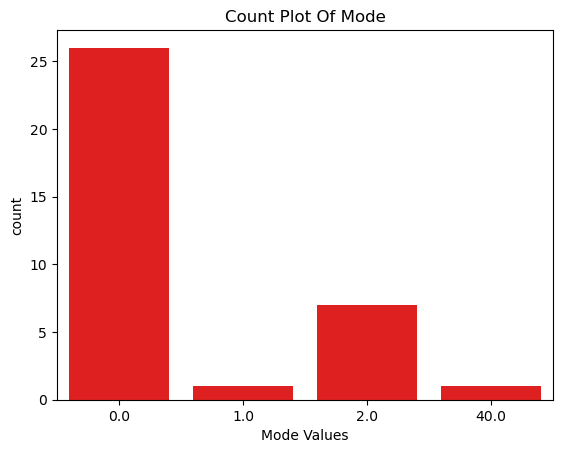

In [33]:
sns.countplot( x=mode, color='red')
plt.title(f'Count Plot Of Mode')
plt.xlabel(f'Mode Values')

## ii) Bivariate Analysis

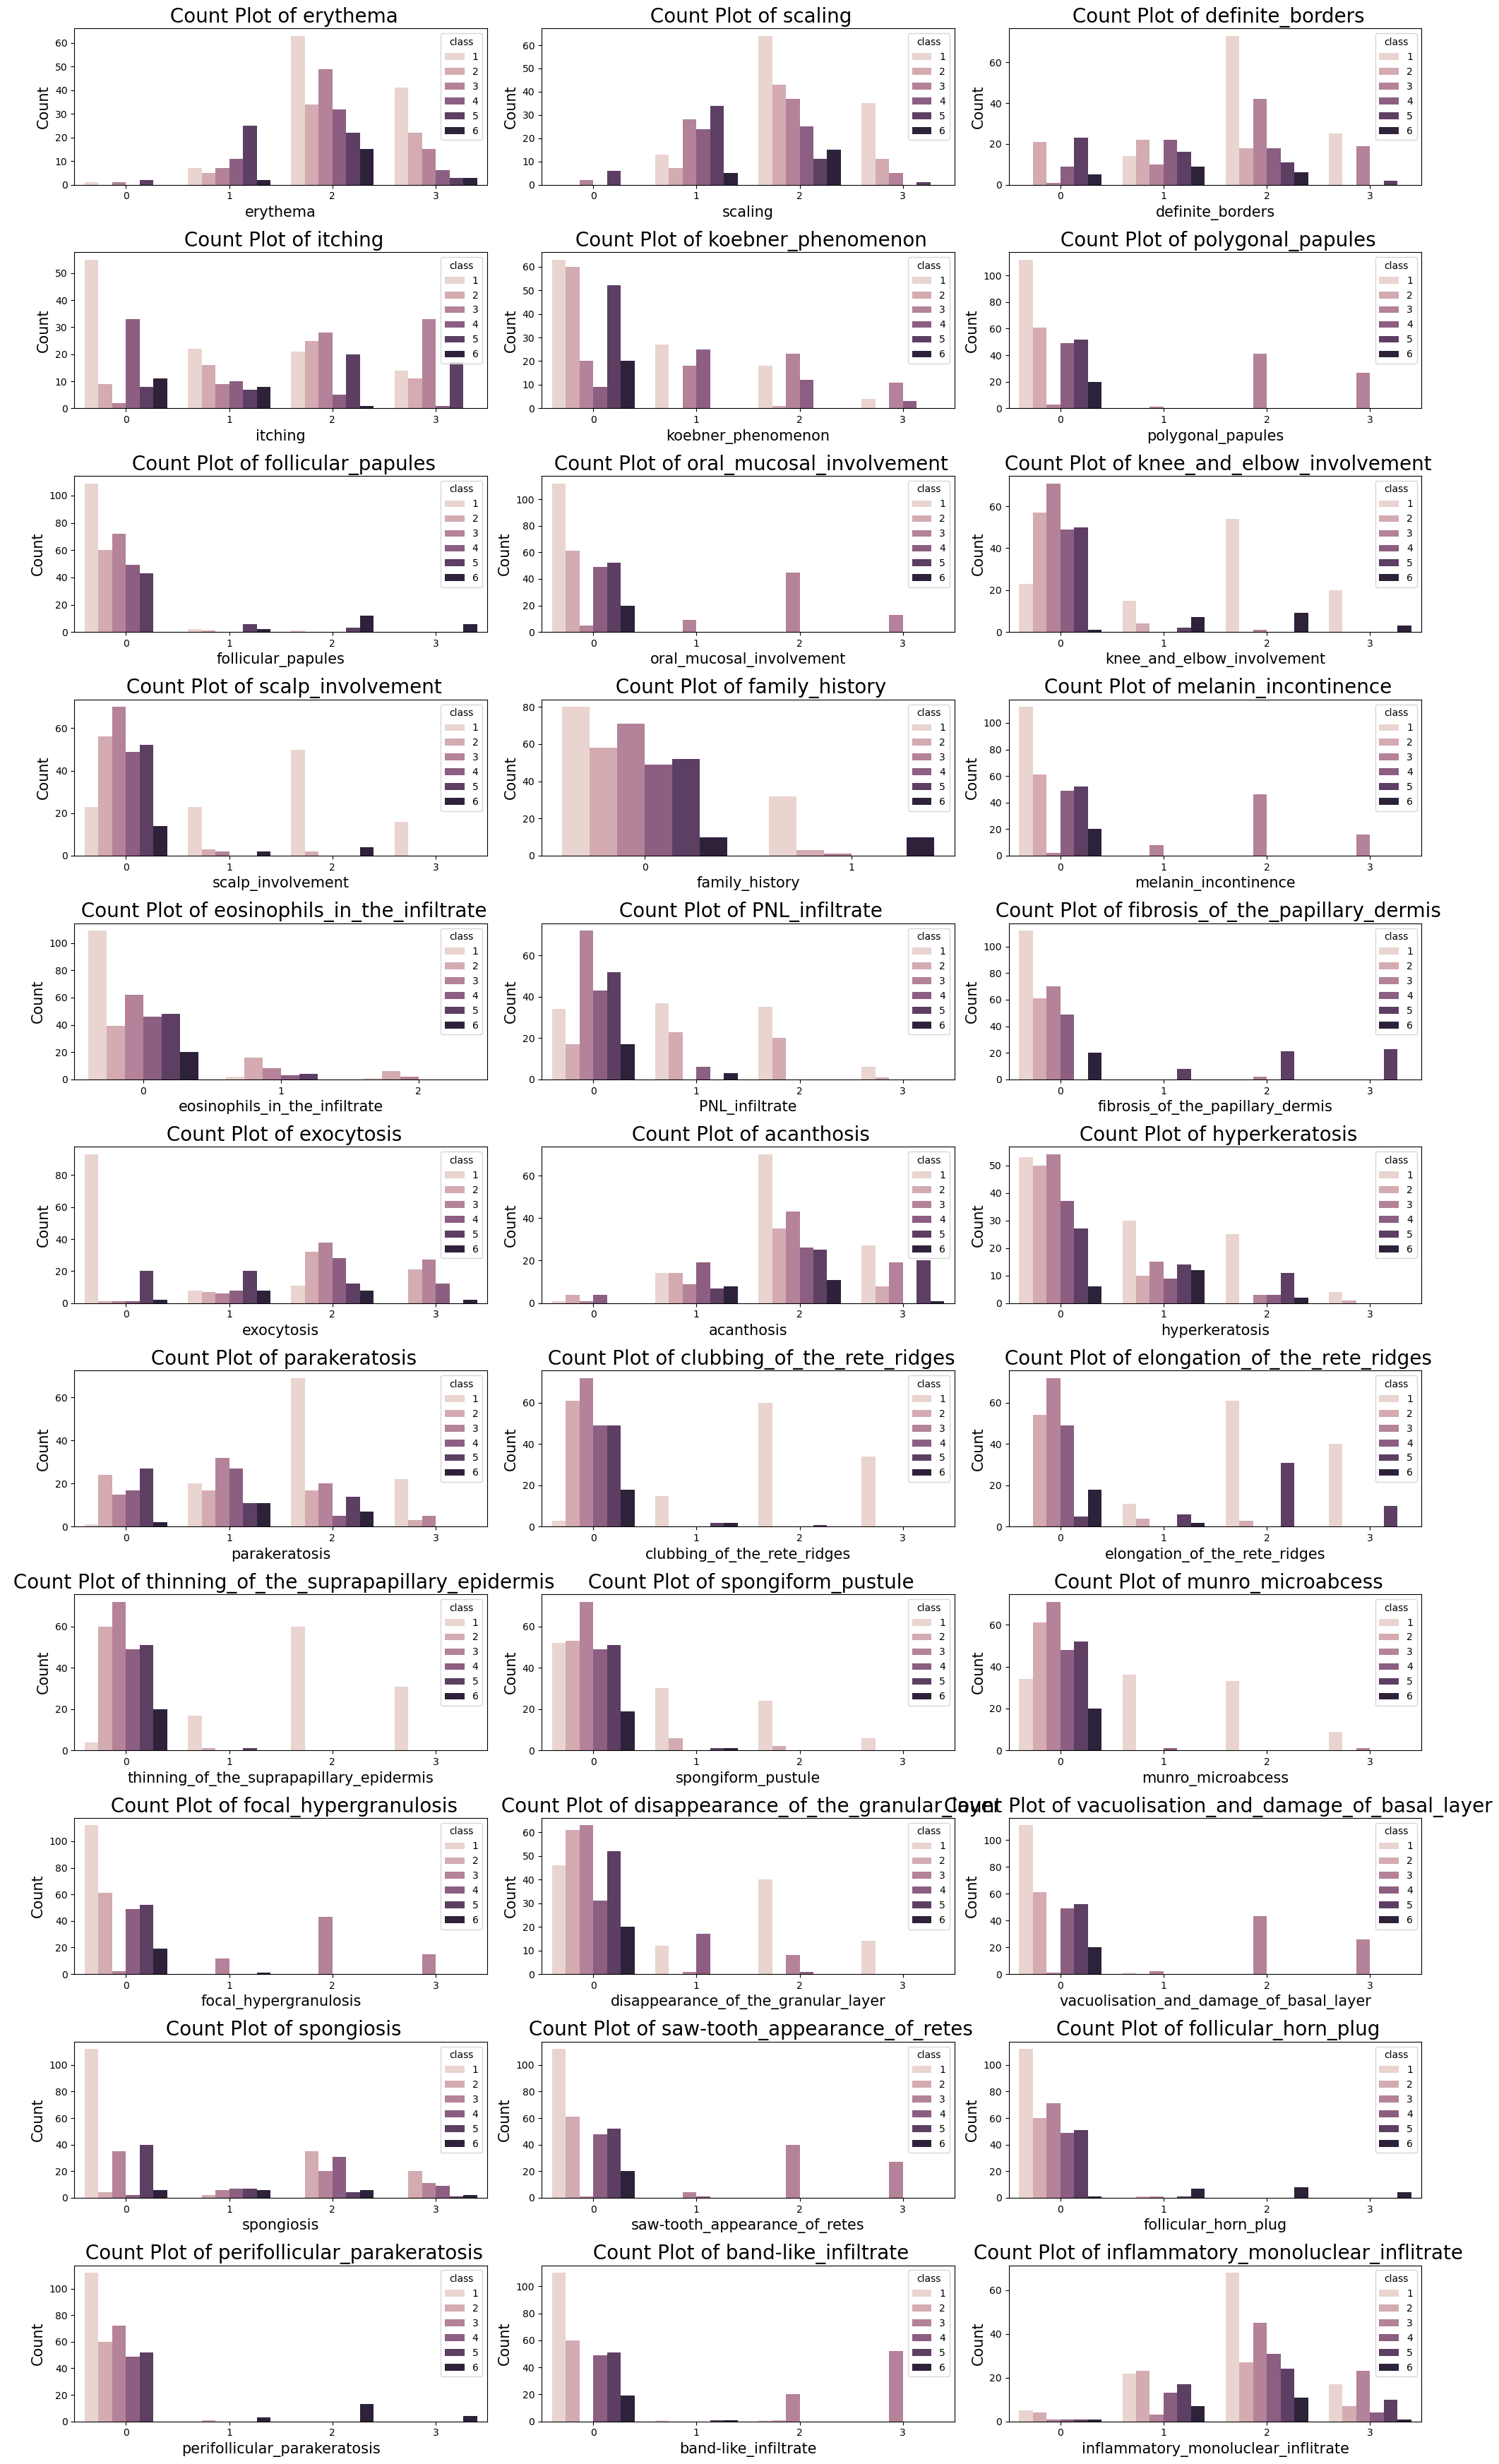

In [36]:
features = ["erythema", "scaling", "definite_borders", "itching", "koebner_phenomenon",
    "polygonal_papules","follicular_papules", "oral_mucosal_involvement", "knee_and_elbow_involvement",
    "scalp_involvement", "family_history", "melanin_incontinence","eosinophils_in_the_infiltrate",
    "PNL_infiltrate", "fibrosis_of_the_papillary_dermis","exocytosis","acanthosis",
    "hyperkeratosis", "parakeratosis", "clubbing_of_the_rete_ridges","elongation_of_the_rete_ridges",
    "thinning_of_the_suprapapillary_epidermis", "spongiform_pustule","munro_microabcess",
    "focal_hypergranulosis","disappearance_of_the_granular_layer","vacuolisation_and_damage_of_basal_layer",
   "spongiosis","saw-tooth_appearance_of_retes","follicular_horn_plug",
    "perifollicular_parakeratosis","band-like_infiltrate","inflammatory_monoluclear_inflitrate"]
data=data
plt.figure(figsize=(20,35))
i = 1
for feature in features:
    plt.subplot(11,3,i)
    sns.countplot(x = feature, data = data, hue = 'class', legend = True)
    plt.title(f' Count Plot of {feature}', fontsize = 20)
    plt.xlabel(feature, fontsize = 15)
    plt.ylabel( f'Count', fontsize = 15)
    i = i+1
plt.tight_layout()
plt.show()

## iii) Multivariate Analysis

<Axes: >

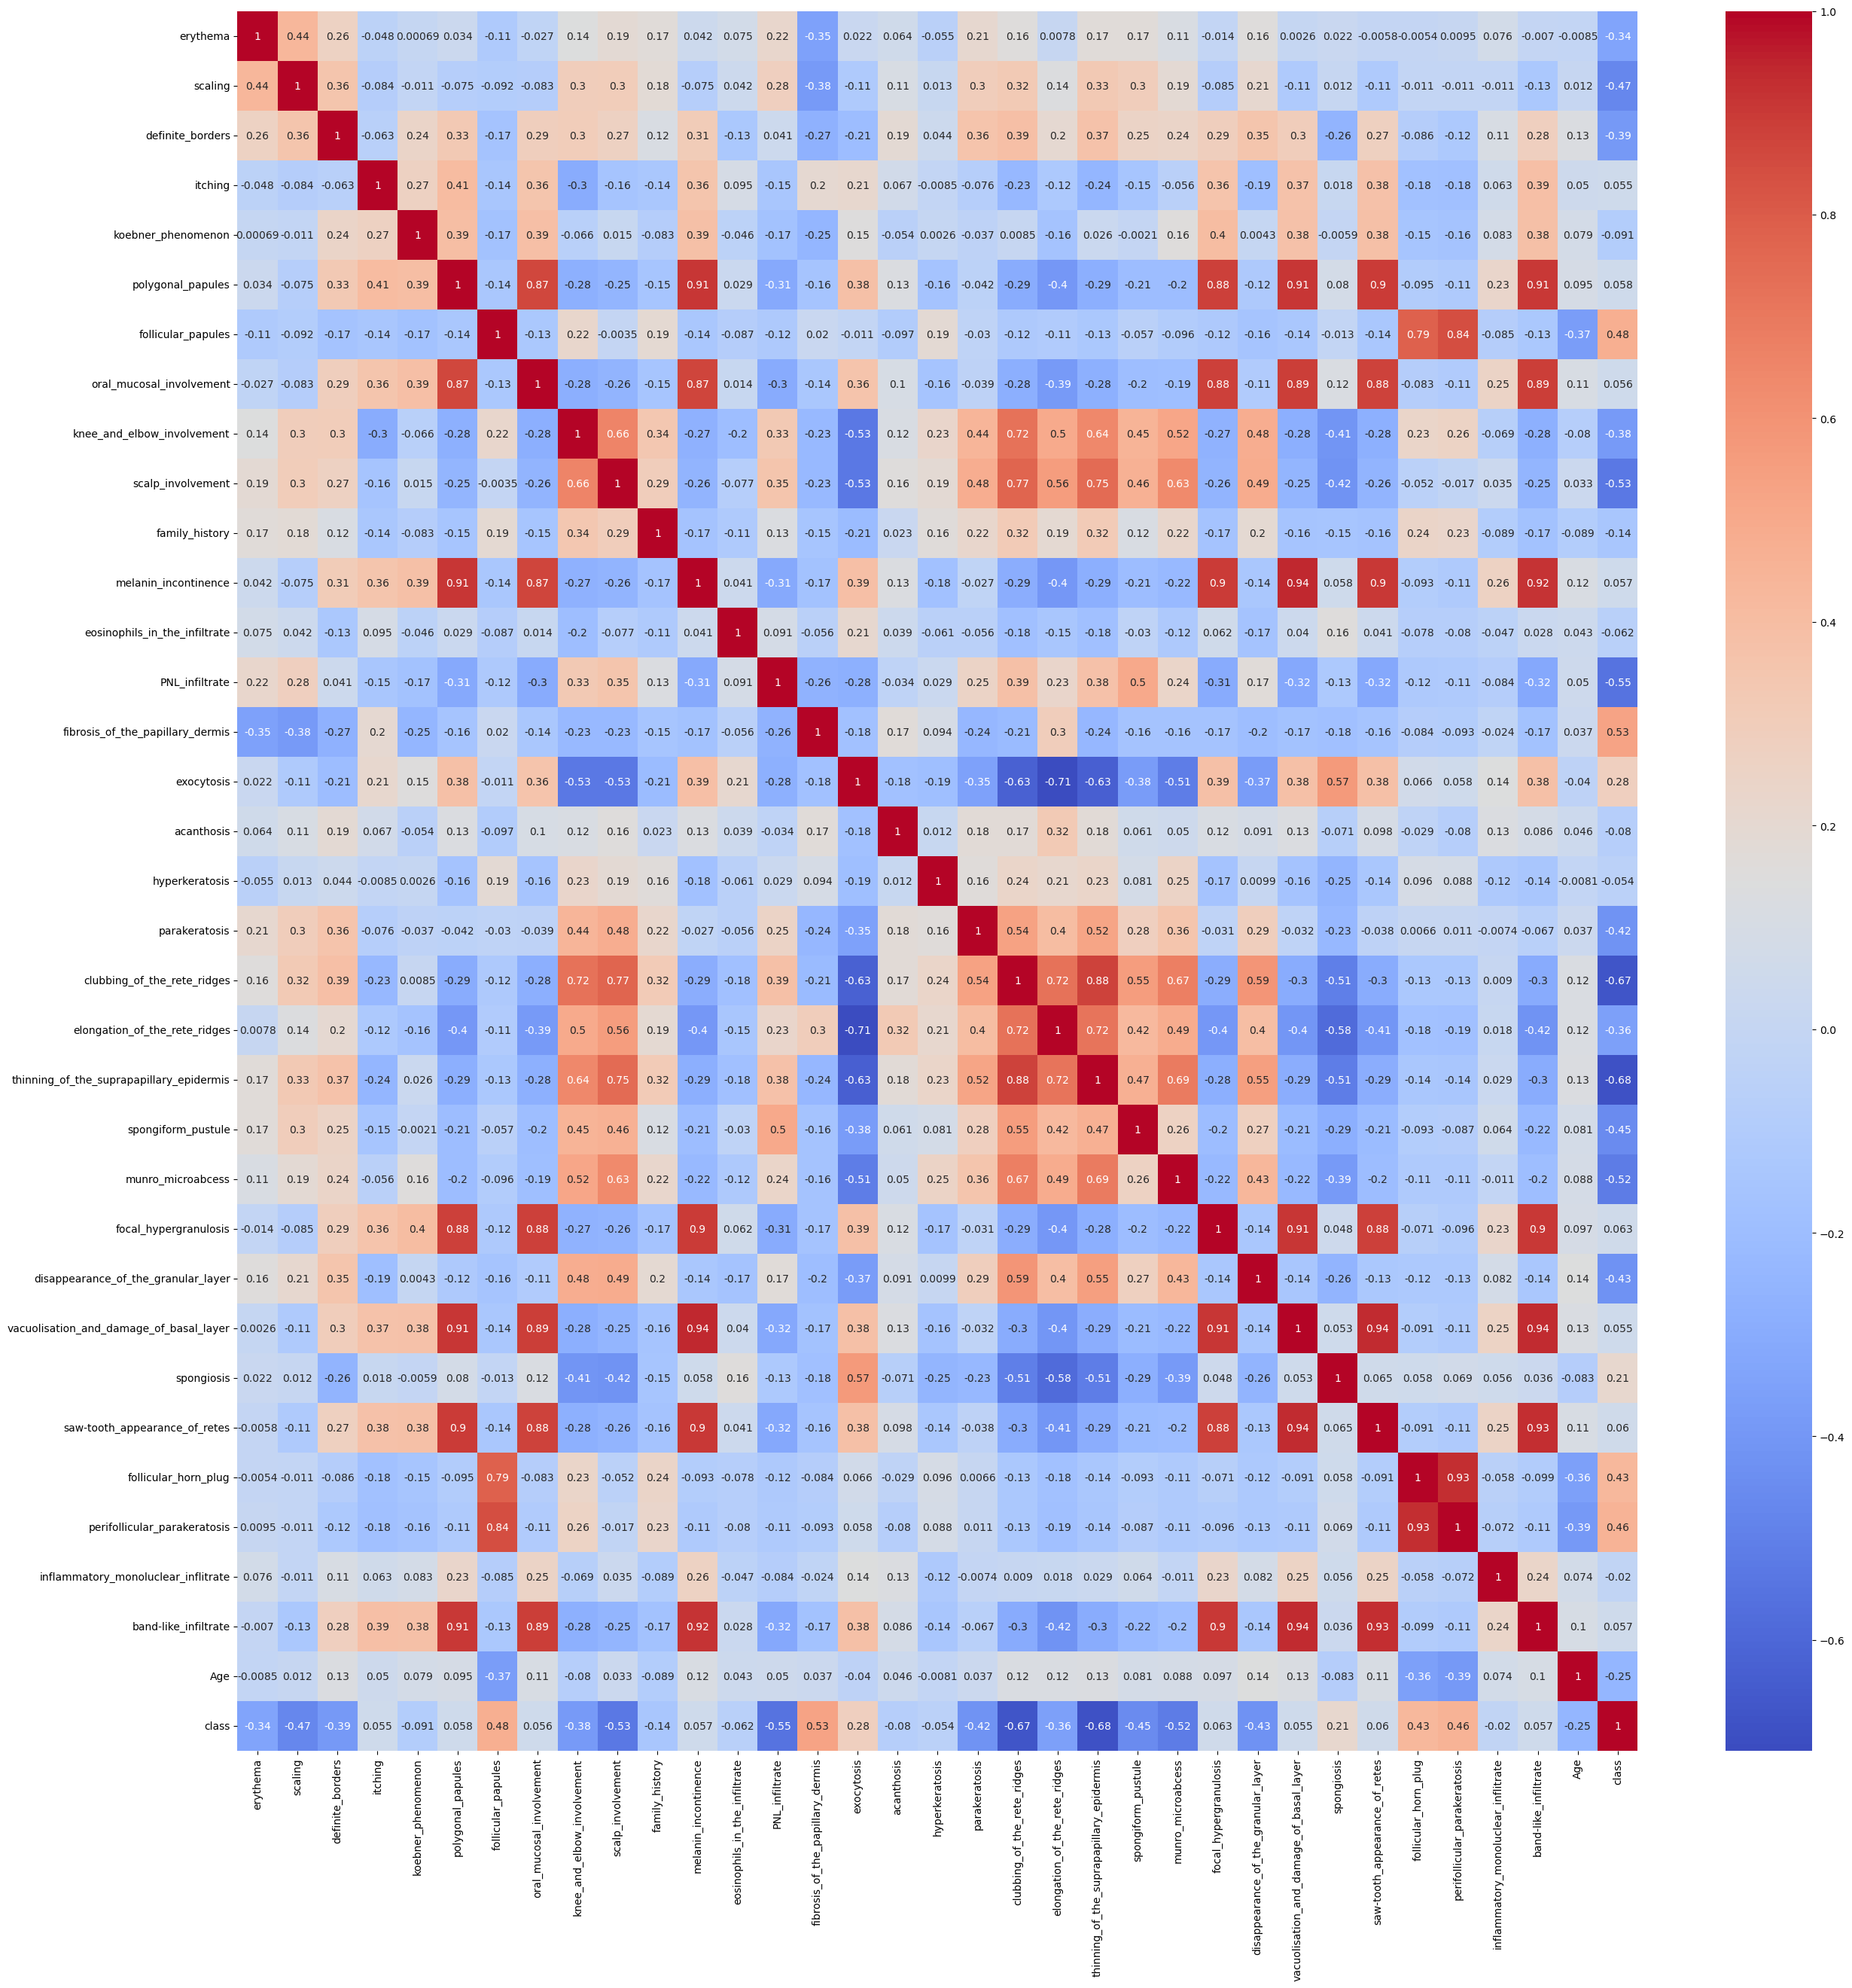

In [38]:
corr_matrix = data.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr_matrix , annot = True, cmap = 'coolwarm')

# 5) Data Preprocessing and Feature Engineering

## i) PCA

In [41]:
from sklearn.decomposition import PCA
# Separating the target variable and independent variables
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Dropping the 'Age' Column
Age = data['Age']
X_no_Age = X.drop('Age', axis=1)

In [42]:
# Applying PCA on the features excluding 'Age'
pca = PCA()
X_pca = pd.DataFrame(pca.fit_transform(X_no_Age))

# Generating dynamic column names for principal components
num_components = X_pca.shape[1]
X_pca.columns = [f'PC{i+1}' for i in range(num_components)]

In [43]:
# Calculate explained variance and cumulative variance
explained_var = pca.explained_variance_ratio_
cum_var = np.cumsum(explained_var)
print(cum_var)

[0.34721987 0.53520612 0.61105266 0.65776972 0.69588261 0.72998099
 0.75881769 0.78350492 0.80578144 0.82701891 0.846733   0.86395172
 0.87986473 0.89449567 0.90637376 0.91692912 0.92712548 0.93689433
 0.94595275 0.95407051 0.96093008 0.9668674  0.97135152 0.97572963
 0.97992086 0.98378634 0.98717078 0.99026088 0.99307225 0.99577193
 0.99789712 0.9994696  1.        ]


In [44]:
# Selecting principal components that explain up to 90% variance
n_components_90 = np.argmax(cum_var >= 0.90) + 1
print(f"Number of components to retain 90% variance: {n_components_90}")

Number of components to retain 90% variance: 15


In [45]:
X_pca_90 = X_pca.iloc[:, :n_components_90]
# Adding 'Age' column back to the PCA-transformed data
X_final = pd.concat([X_pca_90, Age.reset_index(drop=True)], axis=1)

In [46]:
X_final.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,Age
0,1.324877,-2.877085,-0.545349,-1.704753,0.550942,0.561266,-0.709462,0.811775,-0.555207,-0.660403,-0.026671,-0.702191,-0.738182,-0.902523,0.885418,55.0
1,-2.638778,1.599089,-0.386431,-1.284581,0.176672,0.428969,0.970935,-1.230992,-0.825547,0.436635,-0.488597,0.656003,-0.096279,-0.528114,0.849656,8.0
2,4.885021,2.276692,-0.021494,-0.484996,-0.362347,0.821319,-0.652713,0.038991,0.830274,-1.565008,-0.851929,-0.230444,0.744355,0.980807,0.242740,26.0
3,-4.405840,2.251172,-1.497997,0.443198,-1.132028,0.452737,1.013204,1.860630,-0.135245,-0.334419,-0.209505,-0.063069,1.828868,-0.476482,-1.212766,40.0
4,4.532168,2.717269,-0.481883,0.028316,-0.499173,-1.030593,-0.371368,0.221616,-1.106916,-1.101888,-0.641972,-1.099918,-0.041943,0.699313,-0.078875,45.0


In [47]:
# Splitting the training and testing data
from sklearn.model_selection import train_test_split
X= X_final
y= y=data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 6) Model Implementation

## i) Multiclass Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression
lreg_model = LogisticRegression(random_state=42)
lreg_model.fit(X_train, y_train)

C:\Users\sweet\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

### a) Model Evaluation

In [62]:
y_pred_lreg = lreg_model.predict(X_test)

In [64]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(y_test, y_pred_lreg))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        40
           2       0.83      0.94      0.88        16
           3       1.00      1.00      1.00        19
           4       0.92      0.80      0.86        15
           5       1.00      1.00      1.00        16
           6       1.00      1.00      1.00         4

    accuracy                           0.96       110
   macro avg       0.96      0.96      0.96       110
weighted avg       0.97      0.96      0.96       110



In [66]:
cm_lreg = confusion_matrix(y_test, y_pred_lreg)
print(cm_lreg)
Accu_Sc_Log_reg = accuracy_score(y_test, y_pred_lreg)
Accu_Sc_Log_reg 

[[40  0  0  0  0  0]
 [ 0 15  0  1  0  0]
 [ 0  0 19  0  0  0]
 [ 0  3  0 12  0  0]
 [ 0  0  0  0 16  0]
 [ 0  0  0  0  0  4]]


0.9636363636363636

In [68]:
from sklearn.model_selection import cross_val_score
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
cv_scores_lreg = cross_val_score(lreg_model, X, y, cv=5)
print(cv_scores_lreg.mean())
print(cv_scores_lreg.std())

0.9644576082932247
0.011015294644436362


In [70]:
warnings.resetwarnings()

## ii) Decision Tree

In [73]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [75]:
y_pred_tree = tree_model.predict(X_test)

### a) Model Evaluation

In [78]:
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        40
           2       0.84      1.00      0.91        16
           3       1.00      1.00      1.00        19
           4       1.00      0.80      0.89        15
           5       1.00      1.00      1.00        16
           6       1.00      1.00      1.00         4

    accuracy                           0.97       110
   macro avg       0.97      0.97      0.97       110
weighted avg       0.98      0.97      0.97       110



In [80]:
cm_tree = confusion_matrix(y_test, y_pred_tree)
print(cm_tree)
Accu_Sc_Dec_tree = accuracy_score(y_test, y_pred_tree)
Accu_Sc_Dec_tree

[[40  0  0  0  0  0]
 [ 0 16  0  0  0  0]
 [ 0  0 19  0  0  0]
 [ 0  3  0 12  0  0]
 [ 0  0  0  0 16  0]
 [ 0  0  0  0  0  4]]


0.9727272727272728

## iii) Random Forests

In [83]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [84]:
y_pred_rf = rf_model.predict(X_test)

### a) Model Evaluation

In [88]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        40
           2       0.84      1.00      0.91        16
           3       1.00      1.00      1.00        19
           4       1.00      0.80      0.89        15
           5       1.00      1.00      1.00        16
           6       1.00      1.00      1.00         4

    accuracy                           0.97       110
   macro avg       0.97      0.97      0.97       110
weighted avg       0.98      0.97      0.97       110



In [90]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)
Accu_Sc_RF = accuracy_score(y_test, y_pred_rf)
Accu_Sc_RF

[[40  0  0  0  0  0]
 [ 0 16  0  0  0  0]
 [ 0  0 19  0  0  0]
 [ 0  3  0 12  0  0]
 [ 0  0  0  0 16  0]
 [ 0  0  0  0  0  4]]


0.9727272727272728

## iv) KNN

In [93]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [95]:
y_pred_knn = knn.predict(X_test)

### a) Model Evaluation

In [98]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           1       0.97      0.93      0.95        40
           2       0.47      0.56      0.51        16
           3       1.00      1.00      1.00        19
           4       0.44      0.53      0.48        15
           5       0.92      0.69      0.79        16
           6       0.75      0.75      0.75         4

    accuracy                           0.79       110
   macro avg       0.76      0.74      0.75       110
weighted avg       0.82      0.79      0.80       110



In [100]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
print(cm_knn)
Accu_Sc_knn = accuracy_score(y_test, y_pred_knn)
Accu_Sc_knn

[[37  1  0  0  1  1]
 [ 0  9  0  7  0  0]
 [ 0  0 19  0  0  0]
 [ 0  7  0  8  0  0]
 [ 1  2  0  2 11  0]
 [ 0  0  0  1  0  3]]


0.7909090909090909

## v) SVM 

In [103]:
from sklearn.svm import SVC
SVM = SVC(random_state=42)
SVM.fit(X_train, y_train)

SVC(random_state=42)

In [105]:
y_pred_svm = SVM.predict(X_test)

### a) Model Evaluation

In [108]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           1       0.91      0.97      0.94        40
           2       0.36      1.00      0.53        16
           3       1.00      1.00      1.00        19
           4       0.00      0.00      0.00        15
           5       0.00      0.00      0.00        16
           6       0.75      0.75      0.75         4

    accuracy                           0.70       110
   macro avg       0.50      0.62      0.54       110
weighted avg       0.58      0.70      0.62       110



C:\Users\sweet\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sweet\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sweet\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [110]:
cm_SVM = confusion_matrix(y_test, y_pred_svm)
print(cm_SVM)
print(accuracy_score(y_test, y_pred_svm))

[[39  0  0  0  0  1]
 [ 0 16  0  0  0  0]
 [ 0  0 19  0  0  0]
 [ 0 15  0  0  0  0]
 [ 4 12  0  0  0  0]
 [ 0  1  0  0  0  3]]
0.7


### b) Hyperparameter Tunning

In [113]:
from sklearn.model_selection import GridSearchCV
para_SVM = { 'C' : [1, 10, 100], 'kernel': ['linear', 'poly', 'rbf'],
           'gamma' : ['scale', 'auto', 0.001, 0.01, 0.1, 1],  'max_iter' : [1000, 1500, 2000, 2500]}
SVM = SVC()
grid_search = GridSearchCV( estimator = SVM, param_grid = para_SVM, cv = 5, n_jobs = -1, verbose =1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10, 100],
                         'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
                         'kernel': ['linear', 'poly', 'rbf'],
                         'max_iter': [1000, 1500, 2000, 2500]},
             verbose=1)

In [114]:
best_SVM_model = grid_search.best_estimator_
best_SVM_model

SVC(C=100, gamma=0.001, max_iter=1000)

In [115]:
y_pred_best_svm = best_SVM_model.predict(X_test)

In [116]:
print(classification_report(y_test, y_pred_best_svm))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        40
           2       0.79      0.94      0.86        16
           3       1.00      1.00      1.00        19
           4       0.92      0.80      0.86        15
           5       1.00      1.00      1.00        16
           6       1.00      0.75      0.86         4

    accuracy                           0.95       110
   macro avg       0.95      0.91      0.93       110
weighted avg       0.96      0.95      0.95       110



In [117]:
cm_best_SVM = confusion_matrix(y_test, y_pred_best_svm)
print(cm_best_SVM)
Accu_Sc_svm = accuracy_score(y_test, y_pred_best_svm)
Accu_Sc_svm

[[40  0  0  0  0  0]
 [ 0 15  0  1  0  0]
 [ 0  0 19  0  0  0]
 [ 0  3  0 12  0  0]
 [ 0  0  0  0 16  0]
 [ 0  1  0  0  0  3]]


0.9545454545454546

## vi) MLP 

In [124]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

C:\Users\sweet\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=42)

In [125]:
y_pred_mlp = mlp.predict(X_test)

In [128]:
print(classification_report(y_test, y_pred_mlp))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        40
           2       0.88      0.94      0.91        16
           3       1.00      1.00      1.00        19
           4       0.93      0.87      0.90        15
           5       1.00      1.00      1.00        16
           6       1.00      1.00      1.00         4

    accuracy                           0.97       110
   macro avg       0.97      0.97      0.97       110
weighted avg       0.97      0.97      0.97       110



In [130]:
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
print(cm_mlp)
Accu_Sc_mlp = accuracy_score(y_test, y_pred_mlp)
Accu_Sc_mlp

[[40  0  0  0  0  0]
 [ 0 15  0  1  0  0]
 [ 0  0 19  0  0  0]
 [ 0  2  0 13  0  0]
 [ 0  0  0  0 16  0]
 [ 0  0  0  0  0  4]]


0.9727272727272728

In [132]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore', category = ConvergenceWarning)
cv_scores_mlp = cross_val_score(mlp, X, y, cv=5)
print(cv_scores_mlp.mean())
print(cv_scores_mlp.std())

0.967197334320622
0.00677273903133902


In [133]:
warnings.resetwarnings()

## vii) XG Boost

In [135]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement xgboost (from versions: none)
ERROR: No matching distribution found for xgboost


In [140]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder() 
y_encoded = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)
xgboost = XGBClassifier( num_class=len(label_encoder.classes_))
xgboost.fit(X_train, y_train)

ModuleNotFoundError: No module named 'xgboost'

In [142]:
y_pred_xgboost = xgboost.predict(X_test)

C:\Users\sweet\anaconda3\Lib\site-packages\executing\executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
C:\Users\sweet\anaconda3\Lib\ast.py:587: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return Constant(*args, **kwargs)


NameError: name 'xgboost' is not defined

### a) Model Evaluation

In [145]:
print(classification_report(y_test, y_pred_xgboost))
cm_xgboost = confusion_matrix(y_test, y_pred_xgboost)
print(cm_xgboost)
Accu_Sc_xgboost = accuracy_score(y_test, y_pred_xgboost)
Accu_Sc_xgboost

C:\Users\sweet\anaconda3\Lib\site-packages\executing\executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
C:\Users\sweet\anaconda3\Lib\ast.py:587: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return Constant(*args, **kwargs)


NameError: name 'y_pred_xgboost' is not defined

# 7) Model Comparison Report

In [148]:
# Let's get the accuracy scores of all models
print(Accu_Sc_Log_reg)
print(Accu_Sc_Dec_tree)
print(Accu_Sc_RF)
print(Accu_Sc_knn)
print(Accu_Sc_svm)
print(Accu_Sc_mlp)
print(Accu_Sc_xgboost)

0.9636363636363636
0.9727272727272728
0.9727272727272728
0.7909090909090909
0.9545454545454546
0.9727272727272728


C:\Users\sweet\anaconda3\Lib\site-packages\executing\executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
C:\Users\sweet\anaconda3\Lib\ast.py:587: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return Constant(*args, **kwargs)


NameError: name 'Accu_Sc_xgboost' is not defined

<Axes: >

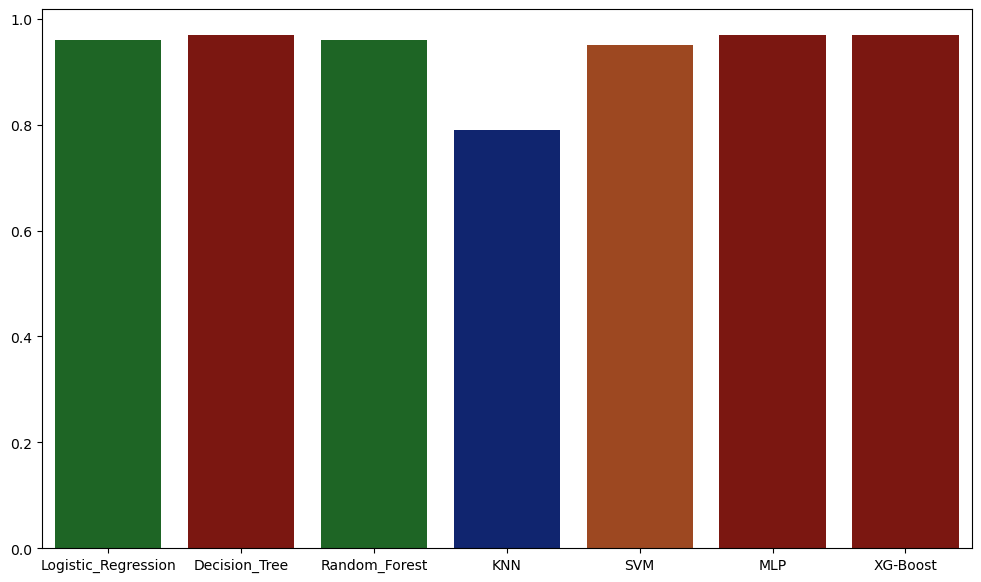

In [150]:
models = ['Logistic_Regression', 'Decision_Tree', 'Random_Forest', 'KNN', 'SVM', 'MLP', 'XG-Boost']
accuracies = [0.96, 0.97, 0.96, 0.79, 0.95, 0.97, 0.97]
plt.figure(figsize= (12,7))
sns.barplot(x = models, y= accuracies, hue = accuracies, palette= 'dark', legend = False)

# 8) Suggestions to the Doctors

# 9) Challenges Faced